# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [2]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2024-12-04 12:21:00--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  81.8MB/s    in 0.2s    

2024-12-04 12:21:01 (81.8 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 4.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [3]:
import pandas as pd
import nltk
import unicodedata
import re

from nltk import ngrams
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [4]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [6]:
# Auxiliary functions
# Function to remove accents and numbers
def clean_text(text):
  # Remove accents
  text = ''.join(
      char for char in unicodedata.normalize("NFKD", text)
      if not unicodedata.combining(char)
  )

  # remove numbers
  text = re.sub(r'\d+', '', text)
  return text

# define stop words
stop_words = nltk.corpus.stopwords.words("portuguese")

# Define the regex pattern to remove stop words
stop_words_pattern = r'\b(?:{})\b'.format('|'.join(stop_words))

# define STEM
stemmer = nltk.stem.RSLPStemmer()

# Preprocessing

# Tokenization
df['posprocessed_news'] = df['preprocessed_news'].apply(nltk.tokenize.word_tokenize)

# Remove accents and and reconstruct texts
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: clean_text(" ".join(text)))

# Lowerize
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: text.lower())

# Remove stop words
df['posprocessed_news'] = df['posprocessed_news'].str.replace(stop_words_pattern, '')
df['posprocessed_news'] = df['posprocessed_news'].str.replace(r'\s+', ' ')

# Remove ponctuation
df['posprocessed_news'] = df['posprocessed_news'].str.replace('[^\w\s]','')

# Leave only STEM words
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: stemmer.stem(text)) # stem every word

# Calculate the median word count
median_word_count = int(df["posprocessed_news"].apply(lambda text: len(text)).median())

# Length of words before truncate operation
df['text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# truncate texts using the median word count for whole dataset
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: " ".join([text[:median_word_count]]))

# Length of words after truncate operation
df['truncate_text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# Split the news text and labels into train and test sets
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    df["posprocessed_news"], # Features
    df['label'], # Labels
    test_size=0.25,
    random_state=42,
    shuffle=True
    )

# Initialize TfidfVectorizer with n-grams from 1 to 3
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.01, max_df=0.9)

# Fit and transform the text data
x_train_tfidf = vectorizer.fit_transform(x_train_raw)  # Fit and transform on training data
x_test_tfidf = vectorizer.transform(x_test_raw)       # Transform testing data (use same vectorizer)

# Convert the TF-IDF matrix to a DataFrame for better readability
train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf_df = pd.DataFrame(x_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Logistic regression with solver lbfgs
y_train = y_train.ravel()  # Converts to a 1D array
y_test = y_test.ravel()    # Converts to a 1D array

clf = skl.linear_model.LogisticRegression(random_state=42).fit(train_tfidf_df, y_train)

# Calculate probabilities
probabilities = clf.predict_proba(x_test_tfidf)
y_pred = clf.predict(x_test_tfidf)

# Get model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


<ipython-input-29-797a900df126>:97: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()  # Converts to a 1D array
<ipython-input-29-797a900df126>:98: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()    # Converts to a 1D array
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Accuracy: 0.92
   * Um total de 28474 tokens foram computadas a partir do conjunto de dados.



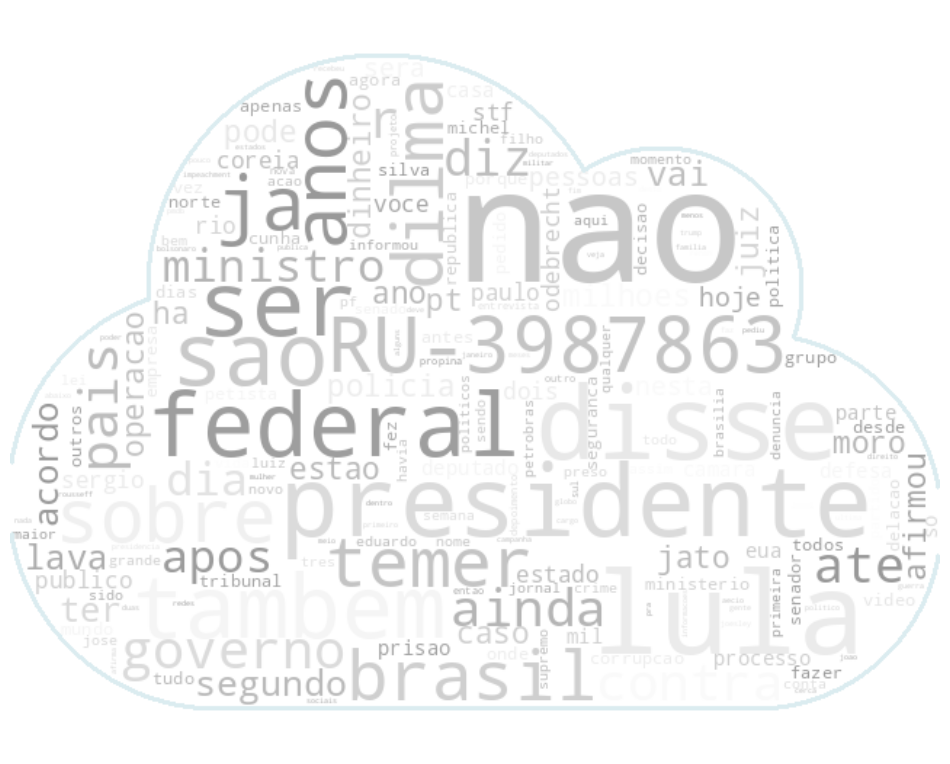

True Texts - Words: 28448, Bigrams: 206453, Trigrams: 254563


In [29]:
from collections import Counter

ru3987863 = 'IDENTIFICADOR PESSOAL!'

# Auxiliary functions
# Function to remove accents and numbers
def clean_text(text):
  # Remove accents
  text = ''.join(
      char for char in unicodedata.normalize("NFKD", text)
      if not unicodedata.combining(char)
  )

  # remove numbers
  text = re.sub(r'\d+', '', text)
  return text

# Auxiliary function
def process_dict(dictionary: dict, df):
  for temp_dict in df['words_and_frequency']:
    for word in temp_dict:
      if word not in dictionary:
        dictionary[word] = temp_dict[word]
      else:
        dictionary[word] += temp_dict[word]
  return dictionary

# Function to count n-grams
def count_ngrams(texts, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    return len(vectorizer.get_feature_names_out())

# define stop words
stop_words = nltk.corpus.stopwords.words("portuguese")

# Define the regex pattern to remove stop words
stop_words_pattern = r'\b(?:{})\b'.format('|'.join(stop_words))

# define STEM
stemmer = nltk.stem.RSLPStemmer()

# Preprocessing

# Tokenization
df['posprocessed_news'] = df['preprocessed_news'].apply(nltk.tokenize.word_tokenize)

# Remove accents and and reconstruct texts
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: clean_text(" ".join(text)))

# Lowerize
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: text.lower())

# Remove stop words
df['posprocessed_news'] = df['posprocessed_news'].str.replace(stop_words_pattern, '')
df['posprocessed_news'] = df['posprocessed_news'].str.replace(r'\s+', ' ')

# Remove ponctuation
df['posprocessed_news'] = df['posprocessed_news'].str.replace('[^\w\s]','')

# Leave only STEM words
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: stemmer.stem(text)) # stem every word

# Calculate the median word count
median_word_count = int(df["posprocessed_news"].apply(lambda text: len(text)).median())

# Length of words before truncate operation
df['text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# truncate texts using the median word count for whole dataset
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: " ".join([text[:median_word_count]]))

# Length of words after truncate operation
df['truncate_text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# Split the news text and labels into train and test sets
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    df["posprocessed_news"], # Features
    df['label'], # Labels
    test_size=0.25,
    random_state=42,
    shuffle=True
    )

# Initialize TfidfVectorizer with n-grams from 1 to 3
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.01, max_df=0.9)

# Fit and transform the text data
x_train_tfidf = vectorizer.fit_transform(x_train_raw)  # Fit and transform on training data
x_test_tfidf = vectorizer.transform(x_test_raw)       # Transform testing data (use same vectorizer)

# Convert the TF-IDF matrix to a DataFrame for better readability
train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf_df = pd.DataFrame(x_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Logistic regression with solver lbfgs
y_train = y_train.ravel()  # Converts to a 1D array
y_test = y_test.ravel()    # Converts to a 1D array

clf = skl.linear_model.LogisticRegression(random_state=42).fit(train_tfidf_df, y_train)

# Calculate probabilities
probabilities = clf.predict_proba(x_test_tfidf)
y_pred = clf.predict(x_test_tfidf)

# Get model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

# Format data used for model training into a dictionary
word_cloud_df = pd.DataFrame([])

word_cloud_df['labels'] = y_train
word_cloud_df['text'] = x_train_raw
word_cloud_df['words_and_frequency'] = x_train_raw.apply(lambda text: Counter(text.split()))

word_cloud_df = word_cloud_df.dropna()

# Get dataset with true ones
word_cloud_df_real = word_cloud_df[word_cloud_df['labels'] == "true"]

true_dict = process_dict({'RU-3987863': 1000}, word_cloud_df_real)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=true_dict,
                     arquivo_mascara="cloud_mask.png")

# Separate the true data
true_texts = word_cloud_df[word_cloud_df["labels"] == "true"]["text"]

# Count words, bigrams, and trigrams for true texts
true_word_count = count_ngrams(true_texts, ngram_range=(1, 1))
true_bigram_count = count_ngrams(true_texts, ngram_range=(2, 2))
true_trigram_count = count_ngrams(true_texts, ngram_range=(3, 3))

# Display the results
print(f"True Texts - Words: {true_word_count}, Bigrams: {true_bigram_count}, Trigrams: {true_trigram_count}")

## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

<ipython-input-28-29772c260a1b>:97: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()  # Converts to a 1D array
<ipython-input-28-29772c260a1b>:98: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()    # Converts to a 1D array
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Accuracy: 0.92
   * Um total de 27991 tokens foram computadas a partir do conjunto de dados.



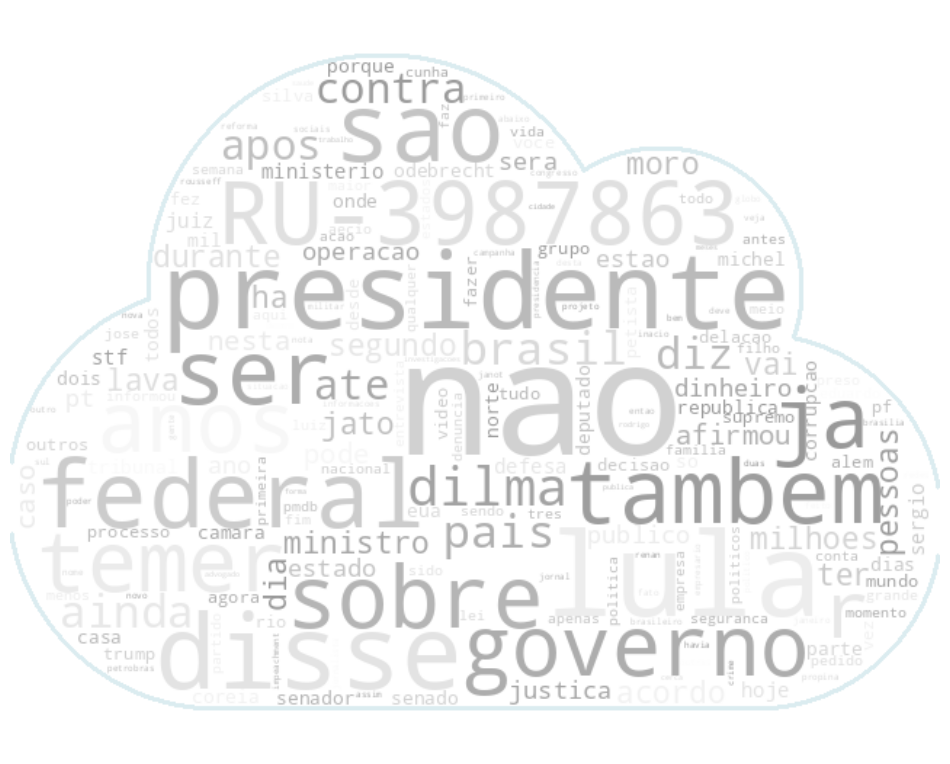

Fake Texts - Words: 27966, Bigrams: 202045, Trigrams: 249931


In [28]:
from collections import Counter

ru3987863 = 'IDENTIFICADOR PESSOAL!'

# Auxiliary functions
# Function to remove accents and numbers
def clean_text(text):
  # Remove accents
  text = ''.join(
      char for char in unicodedata.normalize("NFKD", text)
      if not unicodedata.combining(char)
  )

  # remove numbers
  text = re.sub(r'\d+', '', text)
  return text

# Auxiliary function
def process_dict(dictionary: dict, df):
  for temp_dict in df['words_and_frequency']:
    for word in temp_dict:
      if word not in dictionary:
        dictionary[word] = temp_dict[word]
      else:
        dictionary[word] += temp_dict[word]
  return dictionary

# Function to count n-grams
def count_ngrams(texts, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    return len(vectorizer.get_feature_names_out())

# define stop words
stop_words = nltk.corpus.stopwords.words("portuguese")

# Define the regex pattern to remove stop words
stop_words_pattern = r'\b(?:{})\b'.format('|'.join(stop_words))

# define STEM
stemmer = nltk.stem.RSLPStemmer()

# Preprocessing

# Tokenization
df['posprocessed_news'] = df['preprocessed_news'].apply(nltk.tokenize.word_tokenize)

# Remove accents and and reconstruct texts
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: clean_text(" ".join(text)))

# Lowerize
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: text.lower())

# Remove stop words
df['posprocessed_news'] = df['posprocessed_news'].str.replace(stop_words_pattern, '')
df['posprocessed_news'] = df['posprocessed_news'].str.replace(r'\s+', ' ')

# Remove ponctuation
df['posprocessed_news'] = df['posprocessed_news'].str.replace('[^\w\s]','')

# Leave only STEM words
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: stemmer.stem(text)) # stem every word

# Calculate the median word count
median_word_count = int(df["posprocessed_news"].apply(lambda text: len(text)).median())

# Length of words before truncate operation
df['text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# truncate texts using the median word count for whole dataset
df['posprocessed_news'] = df['posprocessed_news'].apply(lambda text: " ".join([text[:median_word_count]]))

# Length of words after truncate operation
df['truncate_text_length'] = df["posprocessed_news"].apply(lambda text: len(text))

# Split the news text and labels into train and test sets
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    df["posprocessed_news"], # Features
    df['label'], # Labels
    test_size=0.25,
    random_state=42,
    shuffle=True
    )

# Initialize TfidfVectorizer with n-grams from 1 to 3
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.01, max_df=0.9)

# Fit and transform the text data
x_train_tfidf = vectorizer.fit_transform(x_train_raw)  # Fit and transform on training data
x_test_tfidf = vectorizer.transform(x_test_raw)       # Transform testing data (use same vectorizer)

# Convert the TF-IDF matrix to a DataFrame for better readability
train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf_df = pd.DataFrame(x_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Logistic regression with solver lbfgs
y_train = y_train.ravel()  # Converts to a 1D array
y_test = y_test.ravel()    # Converts to a 1D array

clf = skl.linear_model.LogisticRegression(random_state=42).fit(train_tfidf_df, y_train)

# Calculate probabilities
probabilities = clf.predict_proba(x_test_tfidf)
y_pred = clf.predict(x_test_tfidf)

# Get model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

# Auxiliary function
def process_dict(dictionary: dict, df):
  for temp_dict in df['words_and_frequency']:
    for word in temp_dict:
      if word not in dictionary:
        dictionary[word] = temp_dict[word]
      else:
        dictionary[word] += temp_dict[word]
  return dictionary

# Format data used for model training into a dictionary
word_cloud_df = pd.DataFrame([])

word_cloud_df['labels'] = y_train
word_cloud_df['text'] = x_train_raw
word_cloud_df['words_and_frequency'] = x_train_raw.apply(lambda text: Counter(text.split()))

word_cloud_df = word_cloud_df.dropna()

# Get dataset with fake ones
word_cloud_df_fake = word_cloud_df[word_cloud_df['labels'] == "fake"]

fake_dict = process_dict({'RU-3987863': 1000}, word_cloud_df_fake)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=fake_dict,
                     arquivo_mascara="cloud_mask.png")

# Separate the fake and true data
fake_texts = word_cloud_df[word_cloud_df["labels"] == "fake"]["text"]

# Count words, bigrams, and trigrams for fake texts
fake_word_count = count_ngrams(fake_texts, ngram_range=(1, 1))
fake_bigram_count = count_ngrams(fake_texts, ngram_range=(2, 2))
fake_trigram_count = count_ngrams(fake_texts, ngram_range=(3, 3))

# Display the results
print(f"Fake Texts - Words: {fake_word_count}, Bigrams: {fake_bigram_count}, Trigrams: {fake_trigram_count}")

---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

   * Um total de 7 tokens foram computadas a partir do conjunto de dados.



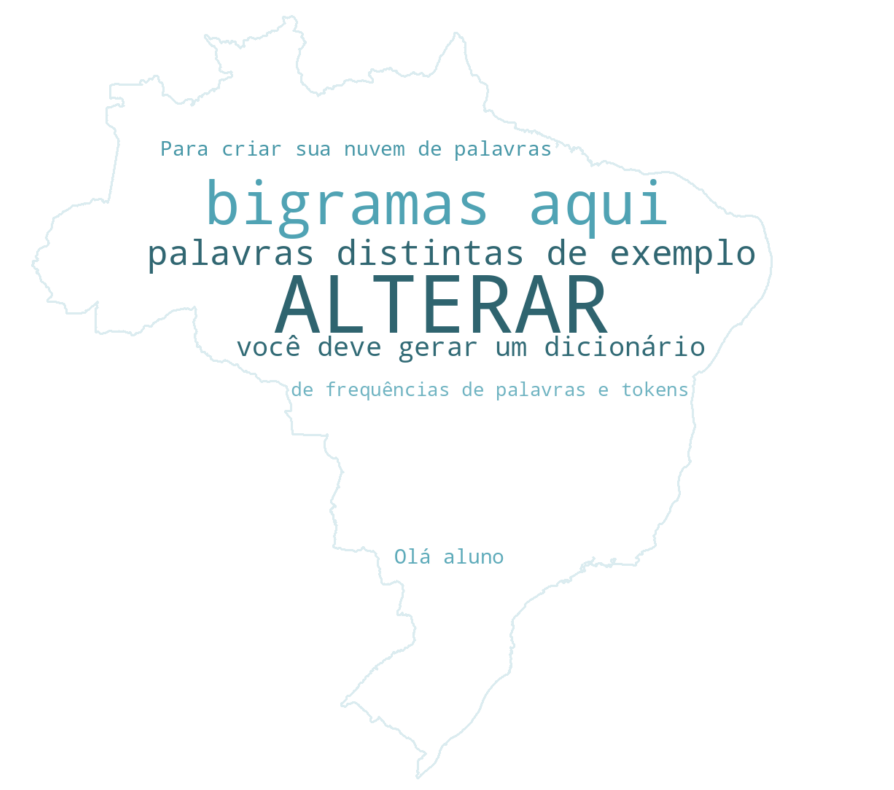

(<wordcloud.wordcloud.WordCloud at 0x7b8554d82830>, 7)

In [11]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png")

{'de palavras': 2, 'exemplo gerar': 1, 'gerar uma': 1, 'uma nuvem': 1, 'nuvem de': 1, 'palavras usando': 1, 'usando texto': 1, 'texto completo': 1, 'completo você': 1, 'você deve': 1, 'deve primeiro': 1, 'primeiro separar': 1, 'separar ele': 1, 'ele um': 1, 'um um': 1, 'um ou': 1, 'ou mais': 1, 'mais tokens': 1, 'tokens para': 1, 'para só': 1, 'só depois': 1, 'depois vetorizar': 1, 'vetorizar ao': 1, 'ao vetorizar': 1, 'vetorizar você': 1, 'você terá': 1, 'bag of': 1, 'of words': 1, 'words que': 1, 'que te': 1, 'te permitirá': 1, 'permitirá contar': 1, 'contar quantas': 1, 'quantas vezes': 1, 'vezes cada': 1, 'cada palavra': 1, 'palavra ou': 1, 'ou grupo': 1, 'grupo de': 1, 'palavras aparecem': 1, 'aparecem no': 1, 'no texto': 1, 'texto por': 1, 'por fim': 1, 'fim basta': 1, 'basta criar': 1, 'criar um': 1, 'um dicionário': 1, 'dicionário contendo': 1, 'chave como': 1, 'seu token': 1, 'valor como': 1, 'frequência de': 1, 'de aparição': 1, 'aparição deste': 1, 'deste tokem': 1}
   * Um 

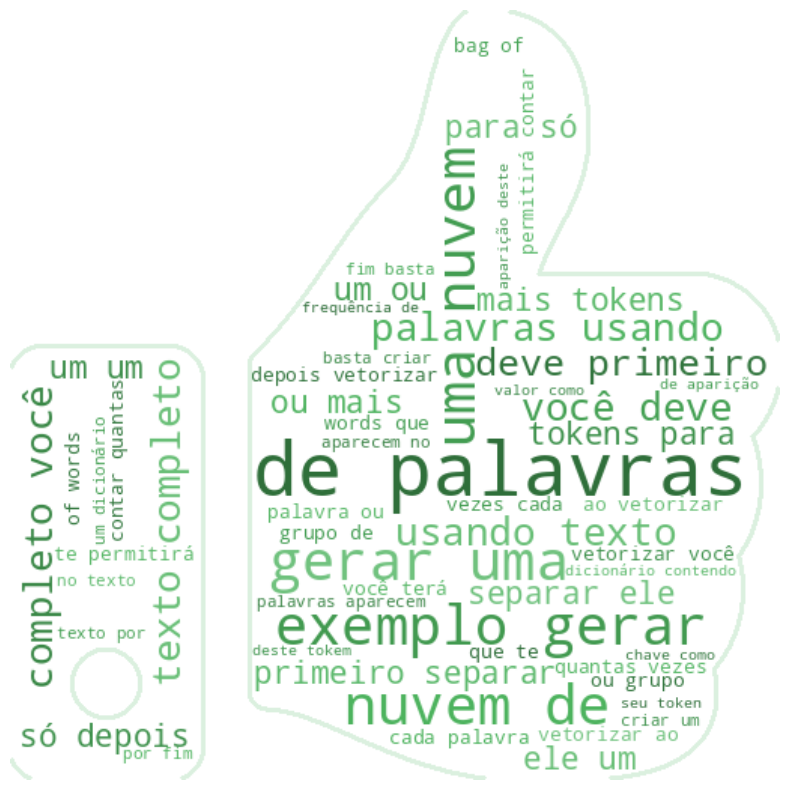

(<wordcloud.wordcloud.WordCloud at 0x7b8554902680>, 56)

In [12]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png')